In [3]:
import cv2
import numpy as np
from scipy.ndimage import convolve
from skimage.morphology import disk
import matplotlib.pyplot as plt

0.6


Text(0.5,1,'red eye spots')

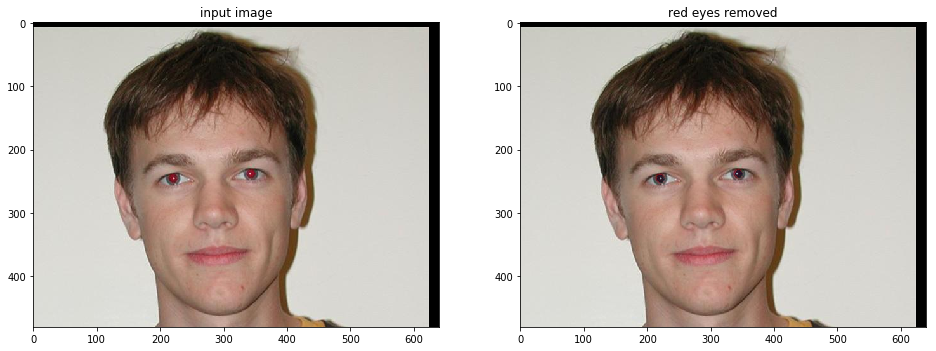

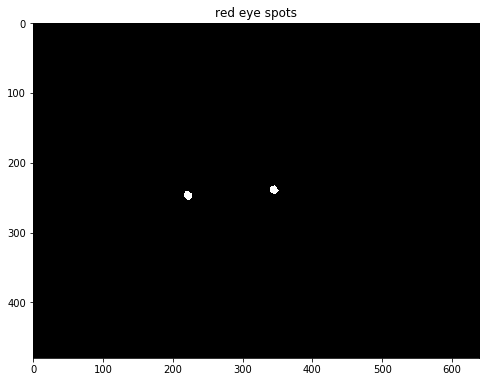

In [38]:
imf = cv2.imread('./dataset/00_02_aligned_face_flash.jpg')
ima = cv2.imread('./dataset/00_01_aligned_face_no_flash.jpg')

imfrbf = cv2.cvtColor(imf, cv2.COLOR_BGR2RGB).astype('double')/255
imarbf = cv2.cvtColor(ima, cv2.COLOR_BGR2RGB).astype('double')/255

[h,w,_] = imf.shape
ya = cv2.cvtColor(ima, cv2.COLOR_BGR2YCR_CB)
yf = cv2.cvtColor(imf, cv2.COLOR_BGR2YCR_CB)

ya = ya.astype('double')
yf = yf.astype('double')

R = yf[:,:,1] - ya[:,:,1]
R = R - np.min(R)
R = R/np.max(R)

flag = np.zeros(R.shape, np.uint8)
flag2 = np.zeros(R.shape, np.uint8)
Rm = np.mean(R)
Rdev = np.std(R)
thr = max(0.6, Rm+(Rdev*2))
print(thr)

flag[R>thr] = 1
flag[(ya[:,:,0]/255) >= 0.5] = 0


maskff = np.zeros((flag.shape[0]+2, flag.shape[1]+2), np.uint8)
cv2.floodFill(flag, maskff, (0,0), 1)
maskff = 1 - maskff
se = disk(2)
se2 = disk(2)
maskff = cv2.erode(maskff, se,iterations=1)
maskff = cv2.dilate(maskff, se2, iterations=1)


[y,x] = np.nonzero(maskff)
im = np.copy(imfrbf)

bias=[26,49]
for i in range(0, y.shape[0]):
    f = 0
    if y[i]<50 or x[i]<50 or x[i] > w-50 or y[i] > h-50:
        f = 1
    else:
        mask = maskff[y[i]-bias[1]:y[i]+bias[1],x[i]-bias[1]:x[i]+bias[1]]
        mask[23:-23,23:-23] = 0
        if np.any(mask == 1) == 1:
            f=1
    if f==0:
        flag2[y[i], x[i]] = 1
        im[y[i], x[i], 0] = 0.8*(0.299*imfrbf[y[i], x[i], 0]+ 0.587*imfrbf[y[i], x[i], 1] + 0.114*imfrbf[y[i], x[i],2])


fig = plt.figure(figsize=[16, 16])
fig.add_subplot(1,2,1) 
plt.imshow(imfrbf) 
plt.title('input image')
fig.add_subplot(1,2,2)
plt.imshow(im) 
plt.title('red eyes removed')

fig = plt.figure(figsize=[8, 8])
plt.imshow(flag2, cmap='gray')
plt.title('red eye spots')
